In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 59.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 69.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 110.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 43.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [4]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2016/train.csv')

In [5]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,rt _hockey: it’s gold gbr rio2016 hockey @_gbh…,0.000,0.000,Neutral
1,1,amazing! congratulations winning modernpentath...,0.825,0.625,Positive
2,2,wait. ashton eaton won decathlon gold again? yas!,0.000,0.000,Neutral
3,3,got shivers watching end chloe esposito's race...,0.000,0.000,Neutral
4,4,celebrating gold! effort! congratulations! 👍💪🏅,0.000,0.000,Neutral


In [6]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2016/test.csv')

In [7]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,75000,add bitcoins goldira investingold buyinggold j...,0.0,0.0,Neutral
1,75001,"focus sports, goldira investingold buyinggold ...",0.0,0.0,Neutral
2,75002,'we're dreading going home goldira investingol...,0.0,0.0,Neutral
3,75003,cast silver bar ira rrsp acceptable. goldira i...,0.0,0.0,Neutral
4,75004,monetary works goldira investingold buyinggold...,0.0,0.0,Neutral


In [8]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [9]:
X_train = data_train.tweet.values.astype(str).tolist()
y_train = data_train.Analysis.values.astype(str).tolist()

X_test = data_test.tweet.values.astype(str).tolist()
y_test = data_test.Analysis.values.astype(str).tolist()

In [10]:
# Building model with transformer
model_name = 'bert-base-multilingual-uncased'

trans = text.Transformer(model_name, maxlen=128)

In [11]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 10
	95percentile : 15
	99percentile : 18


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 10
	95percentile : 21
	99percentile : 21


In [12]:
# getting mbert-base model.
model = trans.get_classifier()

In [13]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [14]:
history = learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
4688/4688 [==============================] - 2122s 446ms/step - loss: 0.1214 - accuracy: 0.9580 - val_loss: 0.3579 - val_accuracy: 0.8912
Epoch 2/5
4688/4688 [==============================] - 2079s 441ms/step - loss: 0.0811 - accuracy: 0.9802 - val_loss: 0.6617 - val_accuracy: 0.8696
Epoch 3/5
4688/4688 [==============================] - 2092s 443ms/step - loss: 0.5773 - accuracy: 0.7553 - val_loss: 0.9816 - val_accuracy: 0.5299
Epoch 4/5
4688/4688 [==============================] - 2088s 443ms/step - loss: 0.9323 - accuracy: 0.5894 - val_loss: 0.9455 - val_accuracy: 0.5299
Epoch 5/5
4688/4688 [==============================] - 2080s 441ms/step - loss: 0.9305 - accuracy: 0.5894 - val_loss: 0.9501 - val_accuracy: 0.5299


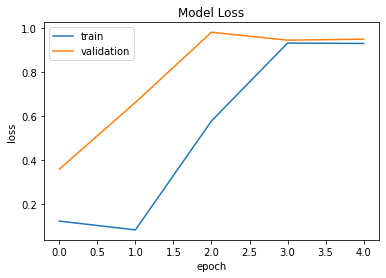

In [15]:
learner.plot('loss')

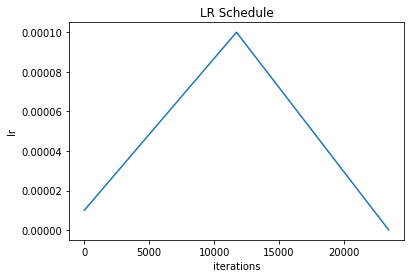

In [16]:
learner.plot('lr')

In [17]:
learner.validate()

242/242 [==============================] - 34s 128ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       757
           1       0.53      1.00      0.69      4099
           2       0.00      0.00      0.00      2880

    accuracy                           0.53      7736
   macro avg       0.18      0.33      0.23      7736
weighted avg       0.28      0.53      0.37      7736



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[   0,  757,    0],
       [   0, 4099,    0],
       [   0, 2880,    0]])

In [18]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [19]:
y_pred = predictor.predict(X_test)

242/242 [==============================] - 30s 124ms/step
